# Report on simulation of beamline

This jupyter notebook attempts to report on the beam distribution of the beamline from pion- to mu-

## Setup
The setup is 100000 pion- from the target will travel through
- 1 Solenoid with current density  = 158.2 A/mm^2, and with coil length = 130mm with radius 22mm
- 1 defocusing quadrupole magnet (Grad = 0.140) (Length = 1076.3 mm)
- 1 focusing quadrupole magnet (Grad = -0.155) (Length = 1452.525 mm)
- 1 defocusing quadrupole magnet (Grad = 0.140) (Length = 1076.3 mm)

## Detectors
There are two **circular** virtual detector of **radius 15.875mm**
- Detector 1 (5mm from the pi- beam source)
- Detector 8 (5905mm from the pi- beam source. End of beamline)

## Goal:
- Figure out the shape of the distribution of beam
- Count the percentange of mu- at the end of the beamline versus the initial number of pi- from the target

## G4Beamline file
The file is 143 line long. Viewer can see the file in the same folder.
Line 30 of the file details the configuration of beamline

## Distribution of beam source
The beam is Gaussian type, with its mean particle position centered at (0,0) and its sigmaX = sigmaY = -5. 

Its mean particle angle is also at (0,0) and its sigmaXp = sigmaYp = -0.001.

In G4Beamline, negative value is taken as a uniform distribution.

=> Then the beam is of uniform type of both position and angle.

## Output file
The virtual detector 1 outputs the text file 5_detector_1.txt

The virtual detector 8 outputs the text file 5_detector_8.txt

Let us code

In [2]:
import g4blplot as plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# raw data that potentially encompass multiple particles
detector_data = []
detector_data.append(plot.add_text_file("5_detector_1.txt"))
detector_data.append(plot.add_text_file("5_detector_8.txt"))

In [ ]:
# Function for graphing
def graph(raw_data, particle_type, use_heat_map):
    data = plot.extract_particle_data(raw_data, particle_type)
    x = plot.get_feature(data,'x')
    y = plot.get_feature(data,'y')
    xp = plot.get_xangle(data)
    yp = plot.get_yangle(data)
    
    fig, axes = plt.subplots(2, sharex=True, sharey=True, layout="constrained", subplot_kw=dict(projection="scatter_density"))
    axes[0].set_xlabel("x position")
    axes[0].set_ylabel("x prime")
    plot.scatter_plot(axes[0], x, xp, use_heat_map)
    plot.scatter_plot(axes[1], y, yp, use_heat_map)

    axes[1].set_xlabel("y position")
    axes[1].set_ylabel("y prime")

# Pion-

## Detector 1
Graphing the detector 1's pi- distribution with both non-heatmap and heatmap

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


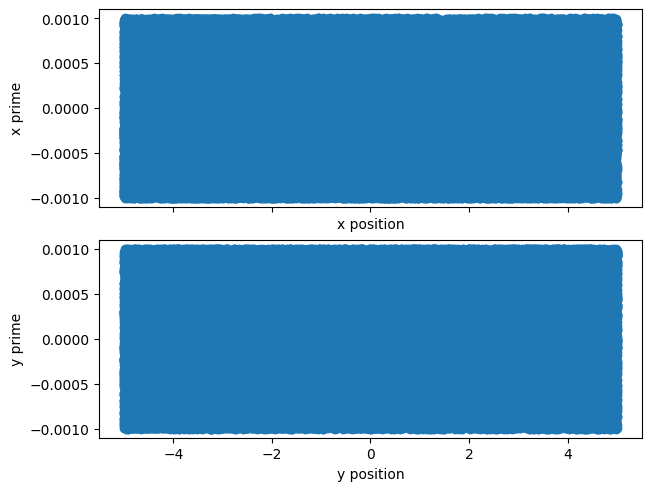

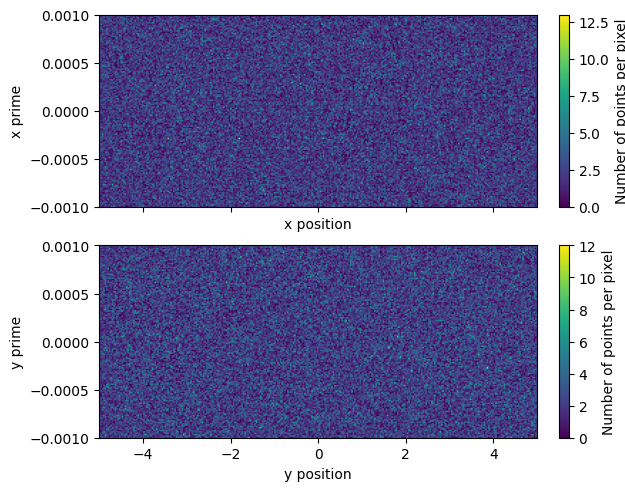

In [ ]:
graph(detector_data[0], "pi-", use_heat_map=False)
graph(detector_data[0], "pi-", use_heat_map=True)
plt.show()

## Detector 8
Graphing the detector 8's pi- distribution with both non-heatmap and heatmap

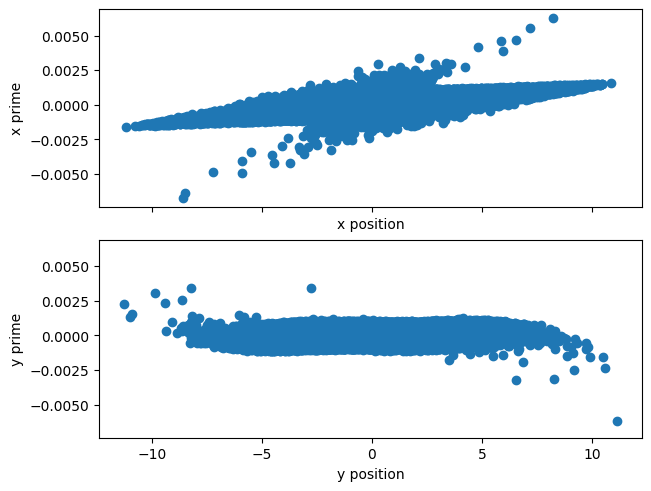

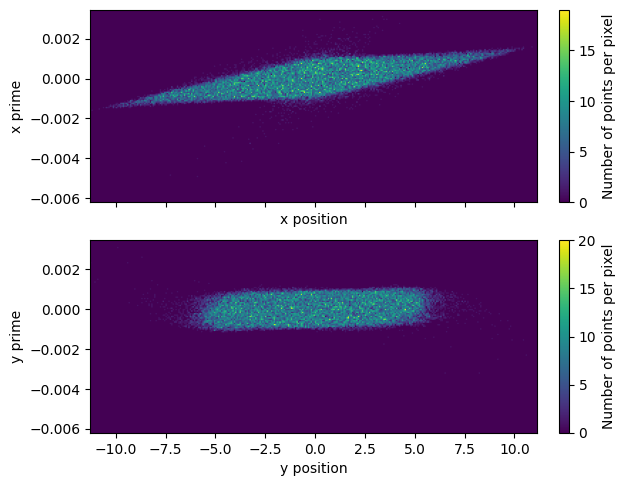

In [ ]:
graph(detector_data[1], "pi-", use_heat_map=False)
graph(detector_data[1], "pi-", use_heat_map=True)
plt.show()

# Muon-

## Detector 1

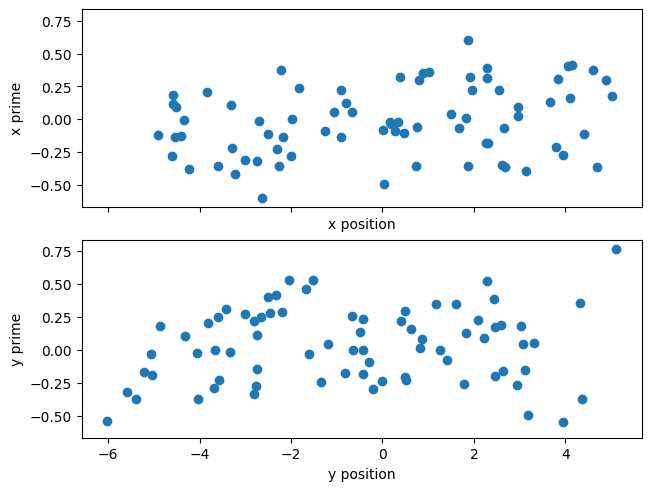

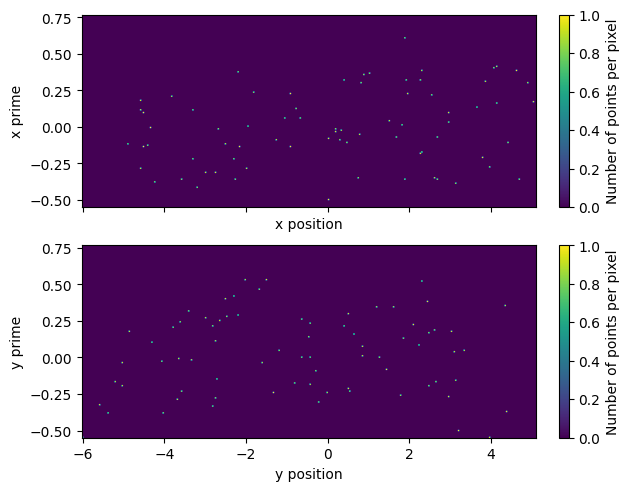

In [ ]:
graph(detector_data[0], "mu-", use_heat_map=False)
graph(detector_data[0], "mu-", use_heat_map=True)
plt.show()

## Detector 8

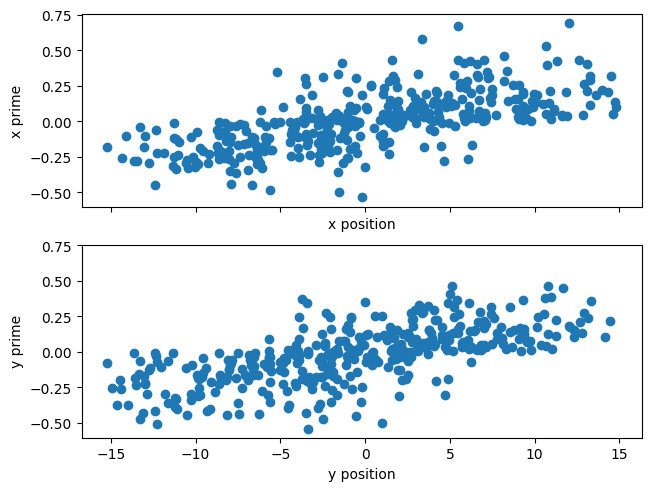

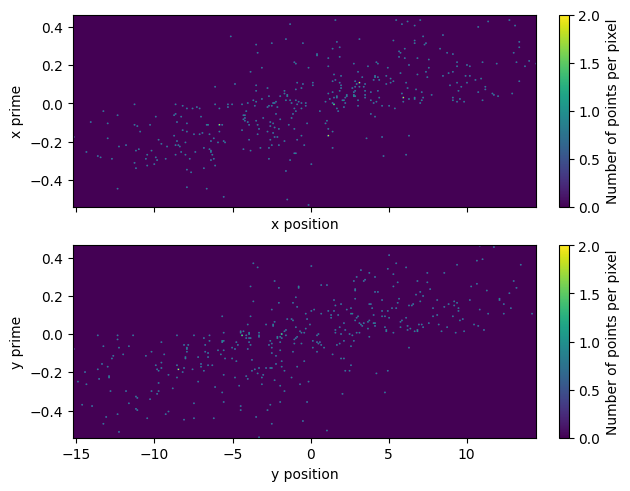

In [ ]:
graph(detector_data[1], "mu-", use_heat_map=False)
graph(detector_data[1], "mu-", use_heat_map=True)
plt.show()

### Conclusion

In [ ]:
mu_count = plot.extract_particle_data(detector_data[1],"mu-").size
print("If we take detector 8 as the destination for mu-'s arrival")
print(f"For 1000000 pion- at the beam source, we get {mu_count} muon- at the end of the beamline.")

print(f"This gives a percentage of mu- (output) over pi- (input) as {(mu_count/100000)*100}% ")

If we take detector 8 as the destination for mu-'s arrival
For 1000000 pion- at the beam source, we get 4668 muon- at the end of the beamline.
This gives a percentage of mu- (output) over pi- (input) as 4.668% 
